<a href="https://colab.research.google.com/github/Bharath1Gowda13/SCT_DS_1/blob/main/Copy_of_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (Colab saves uploaded files in current directory)
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print("Train shape:", train.shape)
print("Test shape:", test.shape)

display(train.head())
display(train.info())
display(train.isnull().sum())


Train shape: (891, 12)
Test shape: (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


/tmp/ipython-input-2838732027.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
/tmp/ipython-input-2838732027.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

Survival counts:
 Survived
0    549
1    342
Name: count, dtype: int64


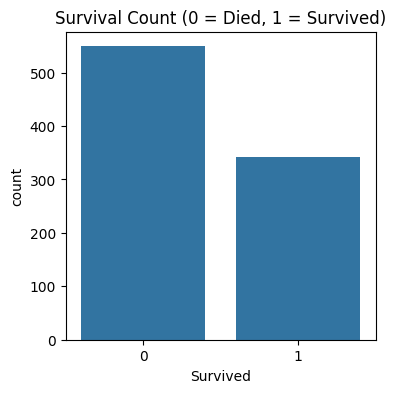

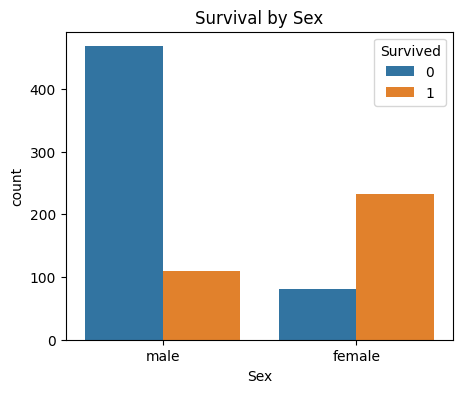

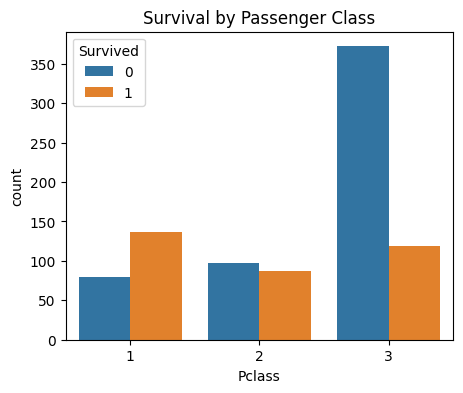

/tmp/ipython-input-2838732027.py:43: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=train, x='Age', hue='Survived', shade=True)


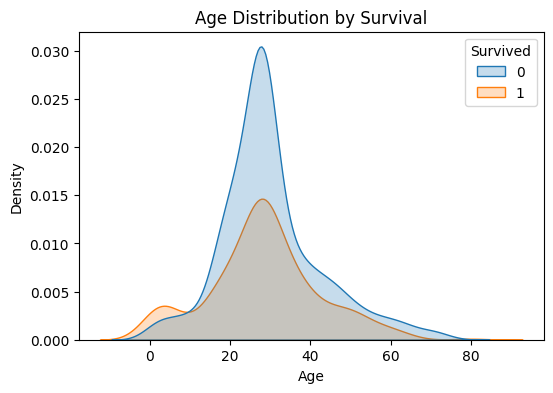

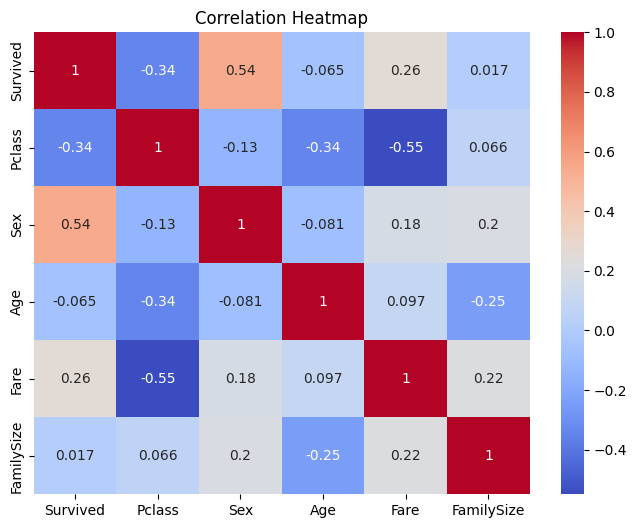

In [ ]:
# ---- 1. Handle missing values ----
# Fill Age with median
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

# Fill Embarked with mode
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# Fill Fare in test
test['Fare'].fillna(test['Fare'].median(), inplace=True)

# Cabin has too many missing values → drop it
train.drop(columns=['Cabin'], inplace=True)
test.drop(columns=['Cabin'], inplace=True)

# ---- 2. Create new feature: FamilySize ----
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

# ---- 3. Quick EDA: target distribution ----
survival_counts = train['Survived'].value_counts()
print("Survival counts:\n", survival_counts)

plt.figure(figsize=(4,4))
sns.countplot(data=train, x='Survived')
plt.title("Survival Count (0 = Died, 1 = Survived)")
plt.show()

# ---- 4. Survival by Sex ----
plt.figure(figsize=(5,4))
sns.countplot(data=train, x='Sex', hue='Survived')
plt.title("Survival by Sex")
plt.show()

# ---- 5. Survival by Pclass ----
plt.figure(figsize=(5,4))
sns.countplot(data=train, x='Pclass', hue='Survived')
plt.title("Survival by Passenger Class")
plt.show()

# ---- 6. Age distribution & Survival ----
plt.figure(figsize=(6,4))
sns.kdeplot(data=train, x='Age', hue='Survived', shade=True)
plt.title("Age Distribution by Survival")
plt.show()

# ---- 7. Correlation Heatmap ----
# Encode Sex and Embarked temporarily for correlation
df_corr = train.copy()
df_corr['Sex'] = df_corr['Sex'].map({'male': 0, 'female': 1})
df_corr['Embarked'] = df_corr['Embarked'].map({'S':0, 'C':1, 'Q':2})

plt.figure(figsize=(8,6))
sns.heatmap(df_corr[['Survived','Pclass','Sex','Age','Fare','FamilySize']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Encode categorical features
le_sex = LabelEncoder()
le_embarked = LabelEncoder()

train['Sex'] = le_sex.fit_transform(train['Sex'])
test['Sex'] = le_sex.transform(test['Sex'])

train['Embarked'] = le_embarked.fit_transform(train['Embarked'])
test['Embarked'] = le_embarked.transform(test['Embarked'])

# Select features
features = ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize']
X = train[features]
y = train['Survived']

# Train/validation split to check accuracy
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier(
    n_estimators=300,
    random_state=42
)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
acc = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {acc:.4f}")


Validation Accuracy: 0.7989


In [ ]:
# Train final model on full training data
model.fit(X, y)

# Predict on test data
test_pred = model.predict(test[features])

# Create submission DataFrame
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': test_pred
})

submission.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1


from matplotlib import pyplot as plt
_df_0['PassengerId'].plot(kind='hist', bins=20, title='PassengerId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Survived'].plot(kind='hist', bins=20, title='Survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='PassengerId', y='Survived', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['PassengerId']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'PassengerId'}, axis=1)
              .sort_values('PassengerId', ascending=True))
  xs = counted['PassengerId']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('PassengerId', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PassengerId')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Survived']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Survived'}, axis=1)
              .sort_values('Survived', ascending=True))
  xs = counted['Survived']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Survived', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Survived')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['PassengerId'].plot(kind='line', figsize=(8, 4), title='PassengerId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Survived'].plot(kind='line', figsize=(8, 4), title='Survived')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from google.colab import files

submission.to_csv("improved_submission.csv", index=False)
files.download("improved_submission.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
import os

file_name = "improved_submission.csv"

if os.path.exists(file_name):
    files.download(file_name)
    print("✔ File downloaded successfully!")
else:
    print("❌ File not found. Check the filename and run model cell again.")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✔ File downloaded successfully!
